# <font color='dimgray'>  <center>Clustering - Mall Customers Segmentation</div>


# <font color='teal'> Business scenario :

Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.

The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer
(discounts, offers, reward points, gifts, etc).

## Data:

The customer dataset has about 200 records in a CSV format.

##  <font color='teal'>Step 1: Environment setup



### Importing necessary packages
  

In [1]:
import pandas as pd #for handling dataset
import numpy as np #for numerical operations

#for graphs
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style

#to handle the warnings
from warnings import filterwarnings
filterwarnings('ignore')

## <font color='teal'>Step 2: Read & Understand Dataset

In [2]:
mall_df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv') # Loading the data

mall_df.head() #to print first 5 records of dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_df.tail() #checking the last 5 records of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Datset information

In [4]:
mall_df.info() #checking the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Dataset structure

In [5]:
print('Structure of the datset:',mall_df.shape) #checking the shape of dataset

Structure of the datset: (200, 5)


### Dataset description

In [6]:
mall_df.describe() #data description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking null values

In [7]:
mall_df.isnull().sum()#checking null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### <div class="alert alert-warning">Interpretation: 
  - No null values are present in the dataset.</div>

## <font color='teal'>Step 3:  Exploratory Data Analysis


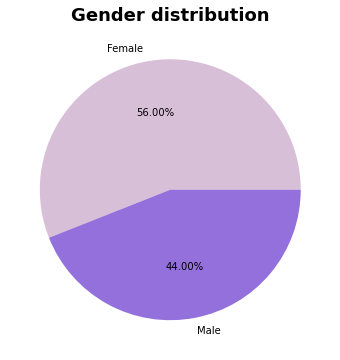

In [8]:
plt.figure(figsize=(15,6))
percentage = mall_df["Gender"].value_counts()         
labels = list( mall_df["Gender"].value_counts().index)
color = ['thistle','mediumpurple']
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",colors=color)
plt.title('Gender distribution',fontweight='bold',fontsize=18)
plt.show()

### <div class="alert alert-warning">Interpretation: 
- From the above visual we can observe that dataset contains 56% of female data and 44 % of male data.</div>

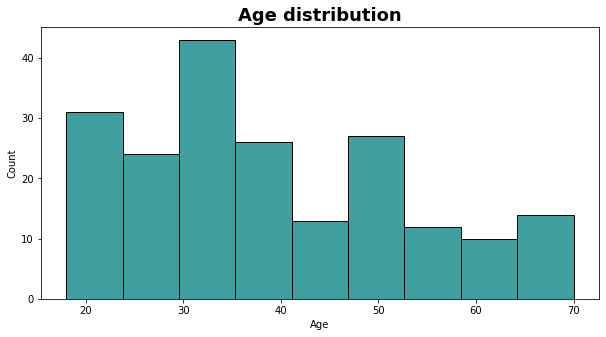

In [9]:
plt.figure(figsize =(10,5))
plt.title("Age distribution",fontweight='bold',fontsize=18)
sns.histplot(mall_df["Age"],color='teal')
plt.show()

### <div class="alert alert-warning">Interpretation: 
- From the above visual we can observe that age 30-35 has more number of customers and age 58 to 65 has less number of customers.</div>

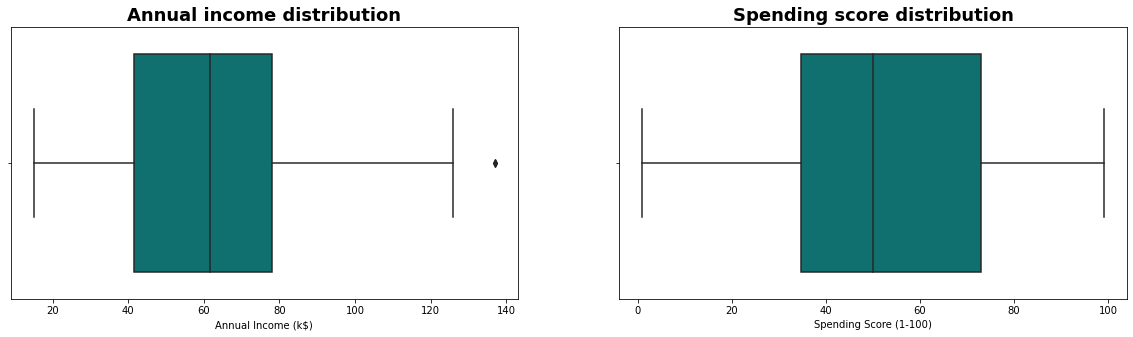

In [10]:
plt.figure(figsize =(20,5))
plt.subplot(1,2,1)
plt.title("Annual income distribution",fontweight='bold',fontsize=18)
sns.boxplot(mall_df["Annual Income (k$)"],color='teal')

plt.subplot(1,2,2)
plt.title("Spending score distribution",fontweight='bold',fontsize=18)
sns.boxplot(mall_df["Spending Score (1-100)"],color='teal')

plt.show()

### <div class="alert alert-warning">Interpretation: 
- From the above visuals we can observe:
    
  1)Customers annual income ranges between 40 - 79 is more.
    
  2)Customers spending score ranges  between 35 - 70</div>

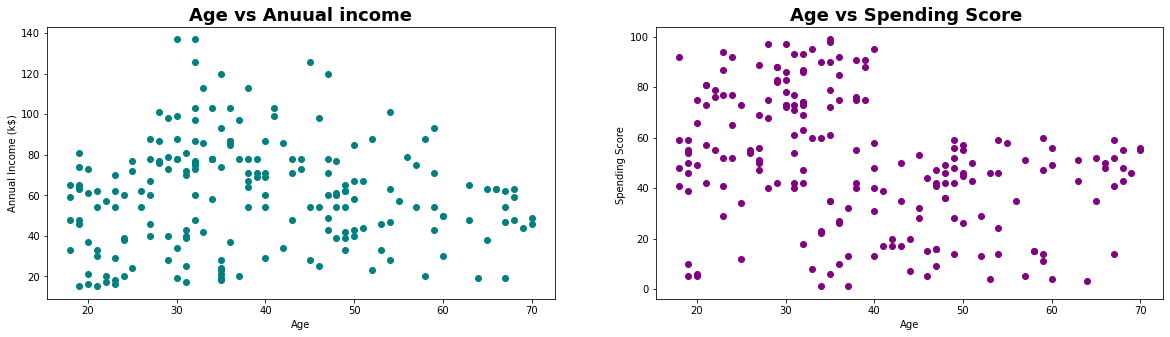

In [11]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.scatter(mall_df['Age'], mall_df['Annual Income (k$)'],c='teal')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Anuual income',fontweight='bold',fontsize=18)

plt.subplot(1,2,2)
plt.scatter(mall_df['Age'], mall_df['Spending Score (1-100)'],c='purple')
plt.xlabel('Age')
plt.ylabel('Spending Score ')
plt.title('Age vs Spending Score ',fontweight='bold',fontsize=18)
plt.show()

### <div class="alert alert-warning">Interpretation: 
- From the first visual we can observe that Annual income in age 35 to 50 is high.
- The spending score is high in the age group below 40.</div>

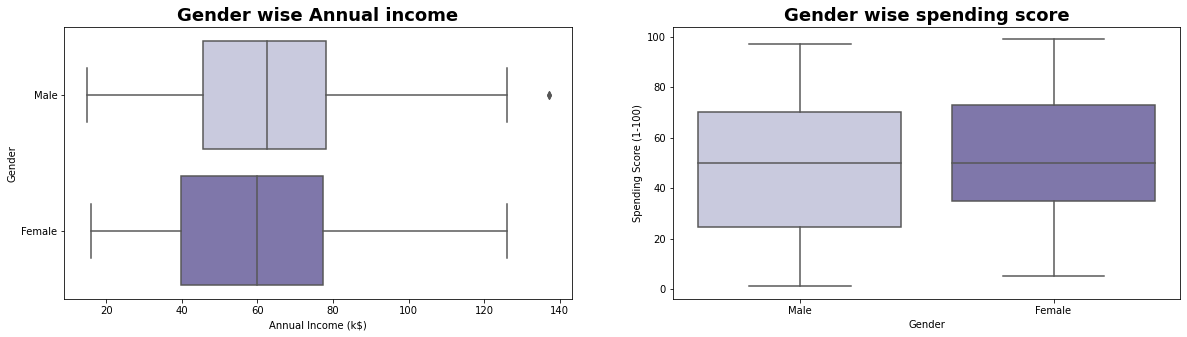

In [12]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.title("Gender wise Annual income",fontweight='bold',fontsize=18)
sns.boxplot(y=mall_df['Gender'], x=mall_df['Annual Income (k$)'],palette='Purples')

plt.subplot(1,2,2)
plt.title("Gender wise spending score",fontweight='bold',fontsize=18)
sns.boxplot(x=mall_df['Gender'], y=mall_df['Spending Score (1-100)'],palette='Purples')

plt.show()


### <div class="alert alert-warning">Interpretation: 
- From the first visual we can observe Annual income of female customers ranges from 40-78k dollars  and Annual income of male customers ranges from 45 to 78k dollars.
- From the second visual we can see that, spending score of male customers ranges from 25 to 75 wheareas for female customers it ranges from 35 to 75.</div>

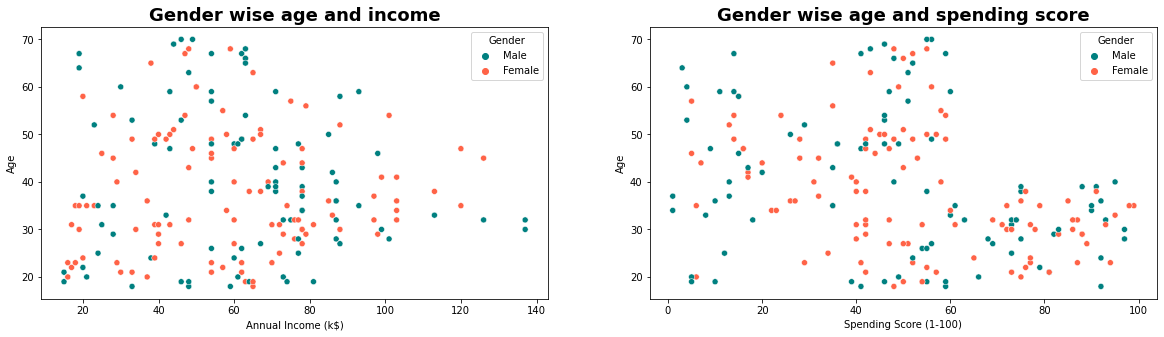

In [13]:
plt.figure(figsize =(20,5))

plt.subplot(1,2,1)
plt.title("Gender wise age and income",fontweight='bold',fontsize=18)
sns.scatterplot(mall_df['Annual Income (k$)'], mall_df["Age"],hue=mall_df["Gender"],palette=['teal','tomato'])

plt.subplot(1,2,2)
plt.title("Gender wise age and spending score",fontweight='bold',fontsize=18)
sns.scatterplot(x=mall_df['Spending Score (1-100)'], y=mall_df["Age"],hue=mall_df["Gender"],palette=['teal','tomato'])

plt.show()

### <div class="alert alert-warning">Interpretation: 
- From the both the visual we can observe that , the male and female are evenly distributed as per their age,annual income and spending score.</div>

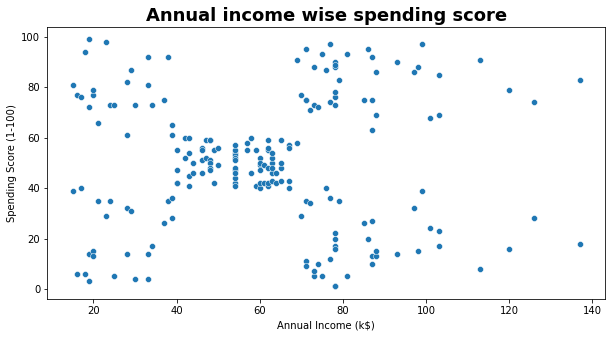

In [14]:
plt.figure(figsize =(10,5))
plt.title('Annual income wise spending score',fontweight='bold',fontsize=18)
sns.scatterplot(x=mall_df['Annual Income (k$)'],y=mall_df['Spending Score (1-100)'])

plt.show()

### <div class="alert alert-warning">Interpretation: 
- From the above visual we can observe The spending score of male is more with people having either more anuual income or less anuual income.
- People with average annual income have spending score between 40-60.</div>

In [16]:
from pandas_profiling import ProfileReport# for profile report
design_report = ProfileReport(mall_df)#creating profile report

In [17]:
design_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
import sweetviz as sv #sweetviz libarary
sweet_report = sv.analyze(mall_df)

                                             |                                             | [  0%]   00:00 ->…

In [69]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


__we work with two features only, annual income and spending score to identify the shopping pattern .__

In [15]:
df=mall_df[["Annual Income (k$)","Spending Score (1-100)"]]

In [16]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## <font color='teal'>Step 5:Model Building

__For clustering we will need to use the unsupervised algorithms.We will use different algorithms to check the cluster formation and compare them.__

# <div style = 'background-color:thistle'> <center> K Means Algorithm</div>

In [17]:
from sklearn.cluster import KMeans #importing Kmeans algorithm

### Determining the best k value using elbow curve

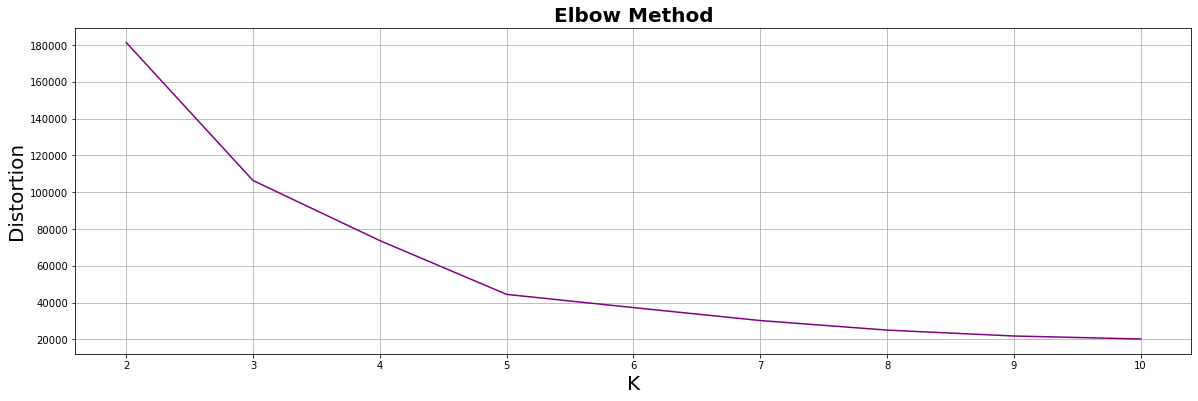

In [18]:
# Elbow method
distortion = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(df)
    distortion.append(kmeans.inertia_)
plt.figure(figsize=(20,6))
plt.plot(range(2,11),distortion,color='purple')
plt.title('Elbow Method', fontsize=20,fontweight='bold')
plt.xlabel('K', fontsize=20)
plt.ylabel('Distortion', fontsize=20)
plt.grid(True)
plt.show()

# <div style = 'background-color:lavender'>Interpretation: 
- From the above elbow curve can observe that optimal k value is k=5 as the distortion is low.</div>


## Silhoutte score calculation

In [19]:
from sklearn.metrics import silhouette_score #to calculate silhouette score

In [20]:
for n_clusters in range(2,7):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"and The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 and The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 and The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 and The average silhouette_score is : 0.553931997444648
For n_clusters = 6 and The average silhouette_score is : 0.53976103063432


# <div style = 'background-color:lavender'>Interpretation: 
- The silhoutte_score is also good at n_cluster=5 so we will use n_clusters=5 for model building</div>

## Model Building


In [21]:
Kmodel1 = KMeans(n_clusters=5).fit(df)#creating model
centroid = Kmodel1.cluster_centers_ #displaying centroid
centroid 

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [22]:
kmodel_pred=Kmodel1.predict(df) #predicting the model
kmodel_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [23]:
K1=silhouette_score(df,kmodel_pred)
print('performance of KMeans without dimension reduction:',K1)

performance of KMeans without dimension reduction: 0.553931997444648


In [24]:
mall_df['km_pred']=kmodel_pred #adding predicted values to copy dataframe
mall_df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),km_pred
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1


# <div style = 'background-color:thistle'> <center>Agglomerative Hierarchical clustering Algorithm</div>

In [25]:
import scipy.cluster.hierarchy as sch #for dendogram
from sklearn.cluster import AgglomerativeClustering #for agglomerative clustering

### Plotting Dendogram to find number of clusters

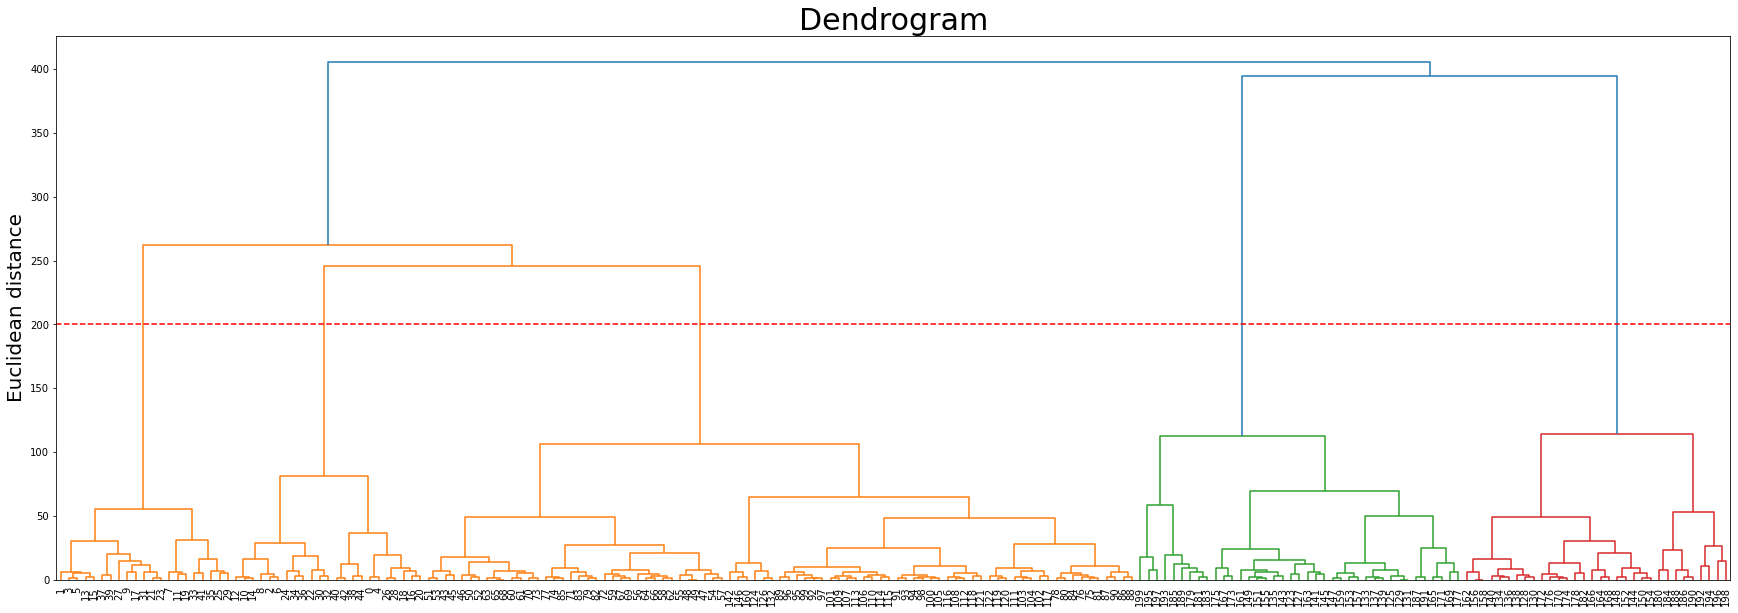

In [26]:
plt.figure(figsize=(30, 10)) #specifying the figure size
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=df.index) #plotting dendogram
plt.axhline(y=200, color='r', linestyle='--') #plotting the threeshold line
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### <div class="alert alert-warning">Interpretation: 
- __The visuals clearly shows us 5 types of clusters so we will use n_clusters=5 for modelling.__</div>

In [27]:
Agglo1 = AgglomerativeClustering(n_clusters =5 , affinity = 'euclidean', linkage = 'ward')#creating model
agglo_pred = Agglo1.fit_predict(df)#predicting values 
agglo_pred 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [28]:
A1=silhouette_score(df,agglo_pred)
print('performance of Agglomerative Hierarchical clustering without dimension reduction:',A1)

performance of Agglomerative Hierarchical clustering without dimension reduction: 0.5529945955148897


In [29]:
mall_df['hier_pred']=agglo_pred #adding predicted values to copy dataframe
mall_df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),km_pred,hier_pred
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,1,3


## <div class="alert alert-info"><center>Model comparison</div>

In [30]:
f=pd.DataFrame([K1,A1],columns=['Silhoutte score'],
              index=['KMeans','Agglomerative'])

In [31]:
f.sort_values(by='Silhoutte score',ascending=False)

,Silhoutte score
KMeans,0.553932
Agglomerative,0.552995


In [37]:
color=['teal','tomato','brown','palevioletred','seagreen']

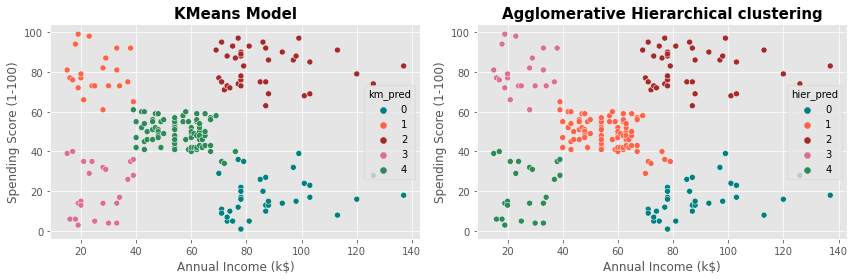

In [38]:
plt.figure(figsize =(12,4))
plt.subplot(1,2,1)
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],hue=mall_df['km_pred'],palette=color)

plt.subplot(1,2,2)
plt.title('Agglomerative Hierarchical clustering',fontweight='bold',fontsize=15)
sns.scatterplot(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],hue=mall_df['hier_pred'],palette=color)



plt.tight_layout()
plt.show()

## <div class="alert alert-info"><center>Final Interpretation</div>

From the above dataframe and the graphs we can conclude that:
  
   - __KMeans and Agglomerative__ gives good clusters, but in Kmeans has slightly better performance than Agglomerative model.
   - __KMeans__ gives the proper cluster formation.
   - K-Means is a good clustering algorithm. 
   - Almost all the clusters have similar density. It is also fast and efficient in terms of computational cost.So choosing that as the __best model__.
   - As data does not consists of outliers, just one outliers, so DBSCAN Algorithm is not used.
     
   

# <div style = 'background-color:lavender'><center>Customer segmetation</div>

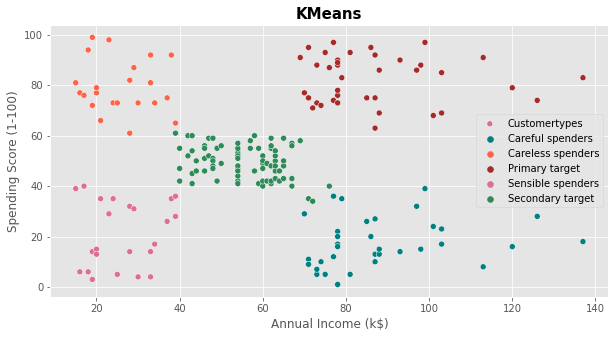

In [44]:
plt.figure(figsize =(10,5))
labels=['Customertypes','Careful spenders','Careless spenders','Primary target','Sensible spenders','Secondary target']
plt.title('KMeans',fontweight='bold',fontsize=15)
sns.scatterplot(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],hue=mall_df['km_pred'],palette=color)
plt.legend(labels=labels)
plt.style.use('ggplot') 
plt.show()



# <div style = 'background-color:lavender'>Interpretation
We can observe from the graph that there are 5 types of clusters formed based on annual income and their spending score.
    
   1) Sensible customers are the customers with low income and low spending score.
   
   2) Careful customers are customers with more income and low spending score.
   
   3) Primary target are the customers with more income and more spending score.
   
   4) Secondary target are the customers with minimum income and spending score.
   
   5) Careless customers are the customers with less income and more spending score.
    
   </div>
     

In [45]:
cust1=mall_df[mall_df["km_pred"]==0]
print('Customer Id of careful spenders =', len(cust1))
print( cust1["CustomerID"].values)
print("--------------------------------------------------------------------------------------------")
cust2=mall_df[mall_df["km_pred"]==1]
print('Customer Id of Careless spenders=', len(cust2))
print( cust2["CustomerID"].values)

print("---------------------------------------------------------------------------------------------")
cust3=mall_df[mall_df["km_pred"]==2]
print('Customer Id of Primary target=', len(cust3))
print( cust3["CustomerID"].values)

print("---------------------------------------------------------------------------------------------")
cust4=mall_df[mall_df["km_pred"]==3]
print('Customer Id of Sensible spenders=', len(cust4))
print(cust4["CustomerID"].values)

print("---------------------------------------------------------------------------------------------")
cust5=mall_df[mall_df["km_pred"]==4]
print('Customer Id of Secondary target =', len(cust5))
print( cust5["CustomerID"].values)

print("---------------------------------------------------------------------------------------------")

Customer Id of careful spenders = 35
[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------------------------------------------------------
Customer Id of Careless spenders= 22
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
---------------------------------------------------------------------------------------------
Customer Id of Primary target= 39
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
---------------------------------------------------------------------------------------------
Customer Id of Sensible spenders= 23
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
---------------------------------------------------------------------------------------------
Customer Id of Secondary target = 81
[

# Inferences

- The Mall shops owners can focus more on people:
   - within the primary target cluster as they have more salary and they spend more.
   - secondly, on secondary target as they have average salary and minimum spending score.
- This cluster customer will be more interested in offers and services of products.
- The shop's in MAll can also focus on careless customers, as they are fond of shopping.

# <div style = 'background-color:lavender'><CENTER>END</div>